# 0 SETUP

## 0.1 Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## 0.2 Helper Functions

### 0.2.1 Data Description & Data Loading Functions

In [16]:
def load_data_array(path):
    # loads the csv files of a given path into a single array
    data_array_raw = []
    i = 0

    while i < 25:
        year = 2000 + i

        match path:
            case 'daily/':
                energy_df = pd.read_csv(HOME_PATH + RAW_DATA_PATH + path + f"CARGA_ENERGIA_{year}.csv", sep = ';')
                energy_df.name  = f"Carga Energia {year}"

            case 'hourly/':
                energy_df = pd.read_csv(HOME_PATH + RAW_DATA_PATH + path + f"CURVA_CARGA_{year}.csv", sep = ';')
                energy_df.name  = f"Curva de Carga {year}"
        
        data_array_raw.append(energy_df)
        i += 1

    return data_array_raw

def show_descriptive_statistics(df):
    # Central Tendency - mean, median
    ct1 = pd.DataFrame(df.apply(np.mean))
    ct2 = pd.DataFrame(df.apply(np.median))    

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(df.apply(np.std))
    d2 = pd.DataFrame(df.apply(min))
    d3 = pd.DataFrame(df.apply(max))
    d4 = pd.DataFrame(df.apply(lambda x: x.max() - x.min()))
    d5 = pd.DataFrame(df.apply(lambda x: x.skew()))
    d6 = pd.DataFrame(df.apply(lambda x: x.kurtosis()))

    m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6], axis = 1).reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median','std', 'skew', 'kurtosis']    
    return m

## 0.3 Path Defitinition

In [3]:
HOME_PATH = '~/Documents/Data Science Projects/br_energy'
RAW_DATA_PATH = '/data/raw/'
HOURLY_DATA_PATH = 'hourly/'
DAILY_DATA_PATH = 'daily/'
INTERIM_DATA_PATH = '/data/interim/'

## 0.4 Loading Data

Para fins de organização, cada diretório terá seus dados carregados em um único array respectivo.

In [4]:
daily_data_array_raw = load_data_array(DAILY_DATA_PATH)
hourly_data_array_raw = load_data_array(HOURLY_DATA_PATH)

# 1 DATA DESCRIPTION

Para nosso estudo, utilizaremos dois conjuntos de dados:

- Carga de Energia Diária: dados de carga por subsistema em base diária, medida em MWmed.
- Curva de Carga Horária: dados de curva de carga horária, que representam o perfil de consumo de energia elétrica com discretização horária.

Tais conjuntos de dados são abertamente fornecidos pelo Operador Nacional do Sistema Elétrico (ONS), sob a licença CC-BY, no endereço: 
https://dados.ons.org.br/ .




## 1.1 Data Types

Como todas as tabelas de cada conjunto de dados têm a mesma estrutura, usaremos a primeira de cada array para exemplificar o formato dos dados. Para mais detalhes, acesse os seguintes dicionários de dados:

- Carga de Energia Diária: https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/carga_energia_di/DicionarioDados_Carga_Energia_Diaria.pdf
- Curva de Carga Horária: https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/curva-carga-ho/DicionarioDados_CurvaCarga.pdf

In [14]:
daily_data_array_raw[0].dtypes

id_subsistema             object
nom_subsistema            object
din_instante              object
val_cargaenergiamwmed    float64
dtype: object

In [15]:
hourly_data_array_raw[0].dtypes

id_subsistema               object
nom_subsistema              object
din_instante                object
val_cargaenergiahomwmed    float64
dtype: object

# 2 EXPLORATORY DATA ANALYSIS

In [6]:
# num_attributes = carga_energia_2000_raw.select_dtypes(include=['int64', 'float64']) # cria um df satisfazendo as condições dos parênteses
# m = show_descriptive_statistics(num_attributes)
# m

NOTA PARA DEPOIS: COLOCAR ESSAS MEDIDAS ACIMA PARA TODOS OS ANOS E COLORIR CONFORME DESVIO EM RELACAO A MEDIA

PRA GERAL E DEPOIS PARA A REGIAO ESCOLHIDA

In [7]:
carga_energia_2000_1 = hourly_data_array_raw[0].copy()

In [8]:
#sudeste_carga_energia_2019['din_instante'] = sudeste_carga_energia_2019['din_instante'].map(lambda data: np.datetime64(data))

carga_energia_2000_1['din_instante'] = pd.to_datetime(carga_energia_2000_1['din_instante'])

In [9]:
sudeste_carga_energia_2000 = carga_energia_2000_1.loc[carga_energia_2000_1['id_subsistema'] == 'S']
sudeste_carga_energia_2000

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiahomwmed
2,S,SUL,2000-01-01 00:00:00,5777.00
6,S,SUL,2000-01-01 01:00:00,5580.70
10,S,SUL,2000-01-01 02:00:00,5098.70
14,S,SUL,2000-01-01 03:00:00,4753.70
18,S,SUL,2000-01-01 04:00:00,4584.10
...,...,...,...,...
35114,S,SUL,2000-12-31 19:00:00,5662.87
35118,S,SUL,2000-12-31 20:00:00,6775.40
35122,S,SUL,2000-12-31 21:00:00,7734.77
35126,S,SUL,2000-12-31 22:00:00,6922.61


<Axes: xlabel='din_instante', ylabel='val_cargaenergiahomwmed'>

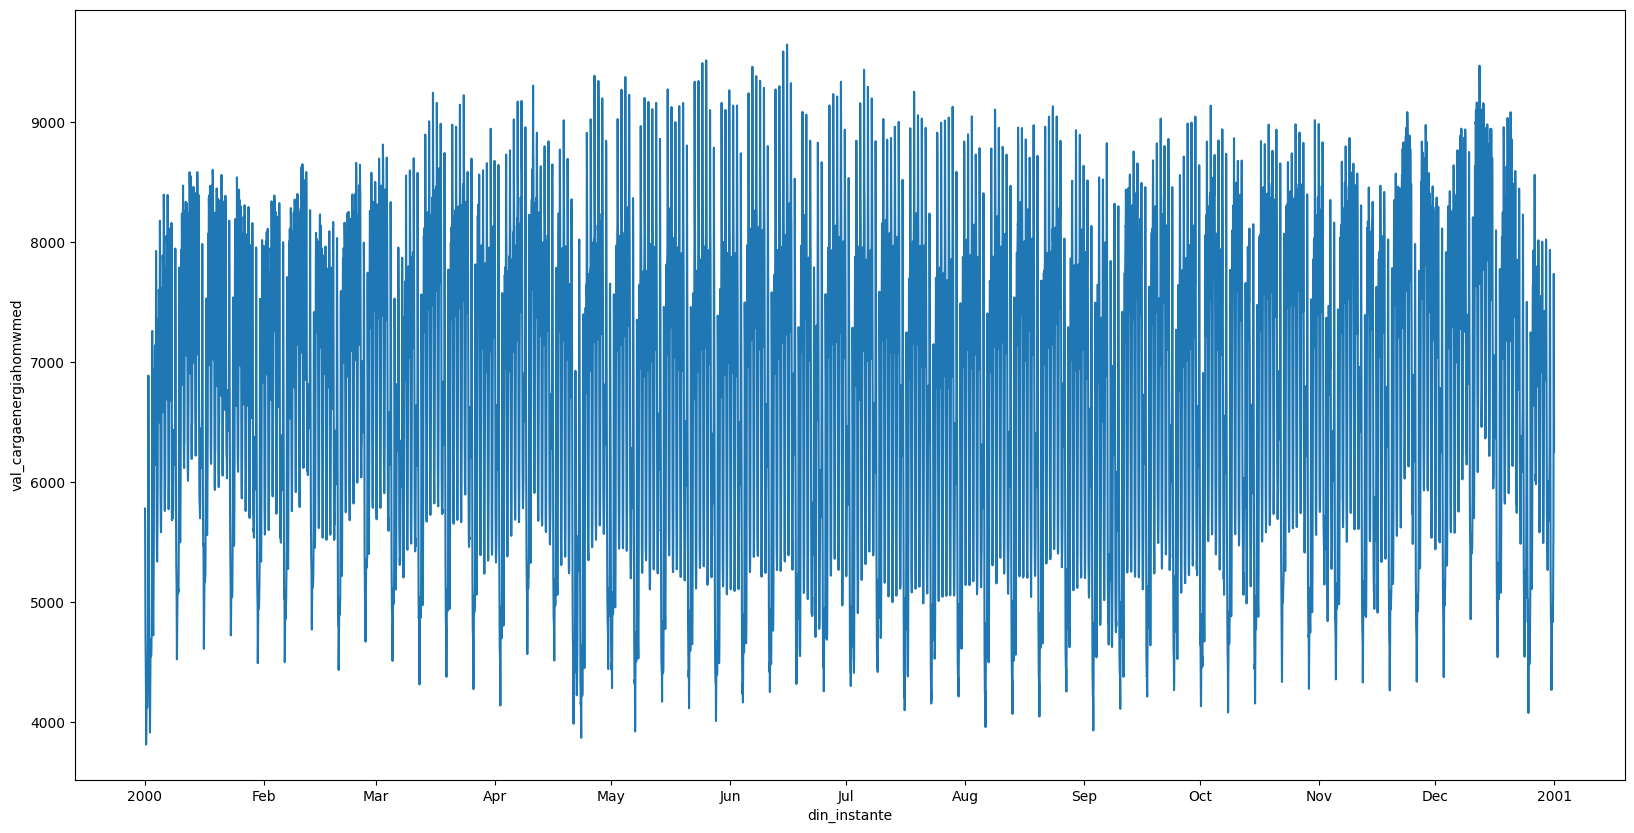

In [10]:
fig, ax = plt.subplots(figsize = (20, 10))
locator = mdates.AutoDateLocator(minticks=12, maxticks=24)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

sns.lineplot(data=sudeste_carga_energia_2000, x=sudeste_carga_energia_2000['din_instante'], y=sudeste_carga_energia_2000['val_cargaenergiahomwmed'])

In [11]:
sns.histplot(sudeste_carga_energia_2000['val_cargaenergiamwmed'])

KeyError: 'val_cargaenergiamwmed'